# Objective Functions

In [1]:
%pylab inline
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import minmax_scale
from scipy.stats import entropy


Populating the interactive namespace from numpy and matplotlib


## Data

In [2]:
p = np.array([0.1, 0.1, 0.05, 0.6, 0.3], dtype=np.float32)
y = np.array([0, 0, 0, 1, 0], dtype=np.float32)

## Mean Squared Error (MSE)

* http://mccormickml.com/2014/03/04/gradient-descent-derivation/

$$ J(\theta) = \frac{1}{N} \sum^{N}_{i=1} \left( h_{\theta}(x^{(i)}) - y^{(i)}  \right)^2 $$

* $ J $ : cost function
* $ \theta $ : parameters (weights)
* N : training data의 갯수
* $ x^{(i)} $ : $ i^{th} $의 training input vector
* $ y^{(i)} $ : $ i^{th} $의 class label
* $ h_{\theta} \left( x^{(i)} \right) $ : $ \theta $를 사용하여 나온 $ i^{th} $ data에 대한 prediction


In [3]:
def mean_squared_error(y, p):
    N = len(p)
    return ((y - p)**2).mean()
    
mean_squared_error(y, p)

0.054499995

In [4]:
metrics.mean_squared_error(y, p)

0.054499995

## Binary Cross Entropy (a.k.a Logarithmic Loss)

* https://www.kaggle.com/wiki/LogarithmicLoss

$$ J(\theta) = -\frac{1}{N} \sum^{N}_{i=1} \left( y^{(i)} \cdot \log(p_i) + (1 - y) \cdot \log(1- p_i) )  \right) $$

binary cross entropy의 경우는 binary classfication에서 주로 사용이 됩니다.

In [5]:
def binary_cross_entropy(y, p):
    return -(y * np.log(p) + (1-y) * np.log(1-p)).mean()

binary_cross_entropy(y, p)

0.22590299

In [6]:
# Scipy와 동일함
metrics.log_loss(y, p)

0.22590298801660538

## Squared Hinge

maximum-margin을 구할때 사용이 됩니다.

$$ J(\theta) = max(0,\ 1 - y * f(x)) = \| y^{(i)} - p^{(i)} \|^2_2 $$

In [7]:
def hinge_loss(y, p):
    return ((y - p)**2).mean()
    
hinge_loss(y, p)

0.054499995

In [8]:
metrics.hinge_loss(y, p)

0.98999999836087227

## KL-Divergence

$$ D_{KL}\left(p(x), q(x)\right) = \sum_{x \in X} p(x) \ln\frac{p(x)}{q(x)} $$


normal a	 normal a	: 0.0
exponent d	 exponent d	: 0.0

normal a	 normal b	: 356.446721056
normal a	 gumbel c	: 2703.59977928
normal a	 exp d   	: 5280.44644113


/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in log


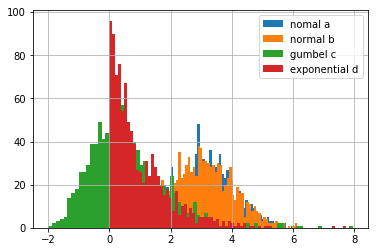

In [22]:
a = np.random.normal(loc=3, size=1000)
b = np.random.normal(loc=3, size=1000)
f = np.random.normal(loc=5, size=1000)
c = np.random.gumbel(size=1000)
d = np.random.exponential(size=1000)

hist(a, bins=80, label='nomal a')
hist(b, bins=80, label='normal b')
hist(c, bins=80, label='gumbel c')
hist(d, bins=80, label='exponential d')
grid()
legend()

print()

def kl_divergence(y, p):
    return np.sum(y * np.nan_to_num(np.log(y/p)), axis=0)

print('normal a\t normal a\t:', kl_divergence(a, a))
print('exponent d\t exponent d\t:', kl_divergence(a, a))
print()
print('normal a\t normal b\t:', kl_divergence(a, b))
print('normal a\t gumbel c\t:', kl_divergence(a, c))
print('normal a\t exp d   \t:', kl_divergence(a, d))